<a href="https://colab.research.google.com/github/madisonyoon/data-visualization/blob/main/%EB%8D%B0%EC%8B%9C%EA%B3%BC%EC%A0%9C_data%EB%B6%84%EC%95%BC_salary_%EC%8B%9C%EA%B0%81%ED%99%94_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data =pd.read_csv("/content/gdrive/MyDrive/ds_salaries.csv")

In [4]:
data.head(7)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:

# 직무에 따라 분류하는 함수 정의
def categorize_job_title(job_title):
    if re.search("Data Scientist", job_title, re.IGNORECASE):
        return "Data Scientist"
    elif re.search("Data Engineer", job_title, re.IGNORECASE):
        return "Data Engineer"
    elif re.search("Analyst", job_title, re.IGNORECASE):
        return "Data Analyst"
    elif re.search("Machine Learning", job_title, re.IGNORECASE):
        return "Machine Learning Engineer"
    elif re.search("Manager|Director", job_title, re.IGNORECASE):
        return "Data Science Manager"
    elif re.search("Architect", job_title, re.IGNORECASE):
        return "Data Architect"
    else:
        return "Other"

# 경험 수준을 카테고리로 변환하는 함수 정의
def categorize_experience_level(experience_level):
    if experience_level == "EN":
        return "Entry"
    elif experience_level == "MI":
        return "Medium"
    elif experience_level == "SE":
        return "Senior"
    elif experience_level == "EX":
        return "Executive"
    else:
        return experience_level

# 데이터 불러오기
data_cleaned =data

# 필터링 및 변환
data_cleaned = data_cleaned[data_cleaned['employee_residence'] == "US"]
data_cleaned['job_title'] = data_cleaned['job_title'].apply(categorize_job_title)
data_cleaned['experience_level'] = data_cleaned['experience_level'].apply(categorize_experience_level)
data_cleaned['experience_level'] = pd.Categorical(data_cleaned['experience_level'], categories=["Entry", "Medium", "Senior", "Executive"], ordered=True)

# 처음 7개 행 표시
print(data_cleaned.head(7))


    work_year experience_level employment_type       job_title  salary  \
1        2023           Medium              CT           Other   30000   
2        2023           Medium              CT           Other   25500   
5        2023           Senior              FT           Other  222200   
6        2023           Senior              FT           Other  136000   
9        2023           Senior              FT  Data Scientist  147100   
10       2023           Senior              FT  Data Scientist   90700   
11       2023           Senior              FT    Data Analyst  130000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
1              USD          30000                 US           100   
2              USD          25500                 US           100   
5              USD         222200                 US             0   
6              USD         136000                 US             0   
9              USD         147100                 US     

In [6]:
data = data.rename(columns={'salary': 'y'})
data.head(5)

,work_year,experience_level,employment_type,job_title,y,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


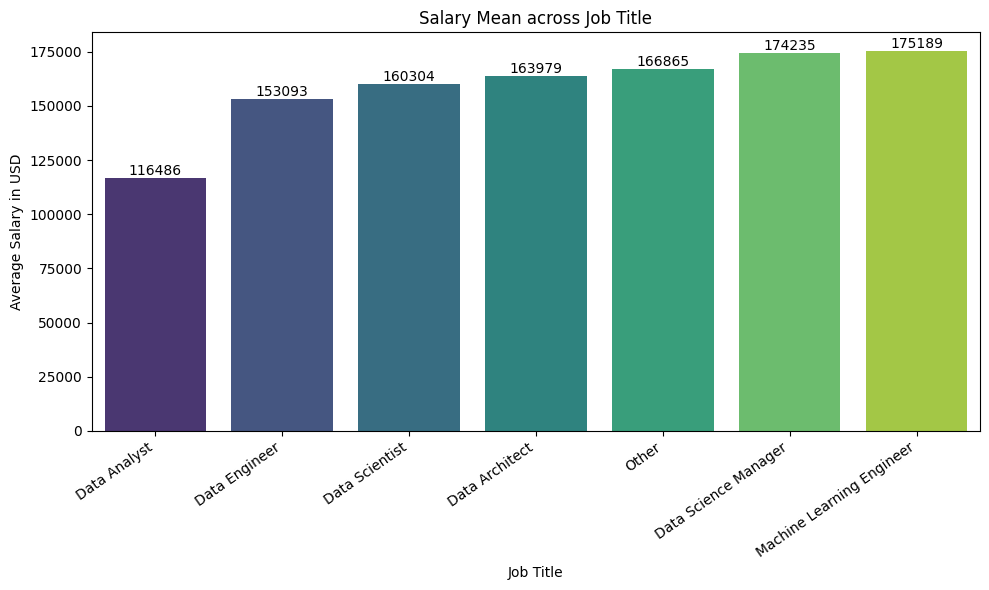

In [ ]:
# 직무별 평균 연봉 계산
avg_salary_by_title = data_cleaned.groupby('job_title')['salary_in_usd'].mean().reset_index()
avg_salary_by_title = avg_salary_by_title.sort_values(by='salary_in_usd', ascending=True)

# seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=avg_salary_by_title, palette='viridis')
plt.title('Salary Mean across Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')

# 막대 위에 정확한 숫자 표시
for index, value in enumerate(avg_salary_by_title['salary_in_usd']):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

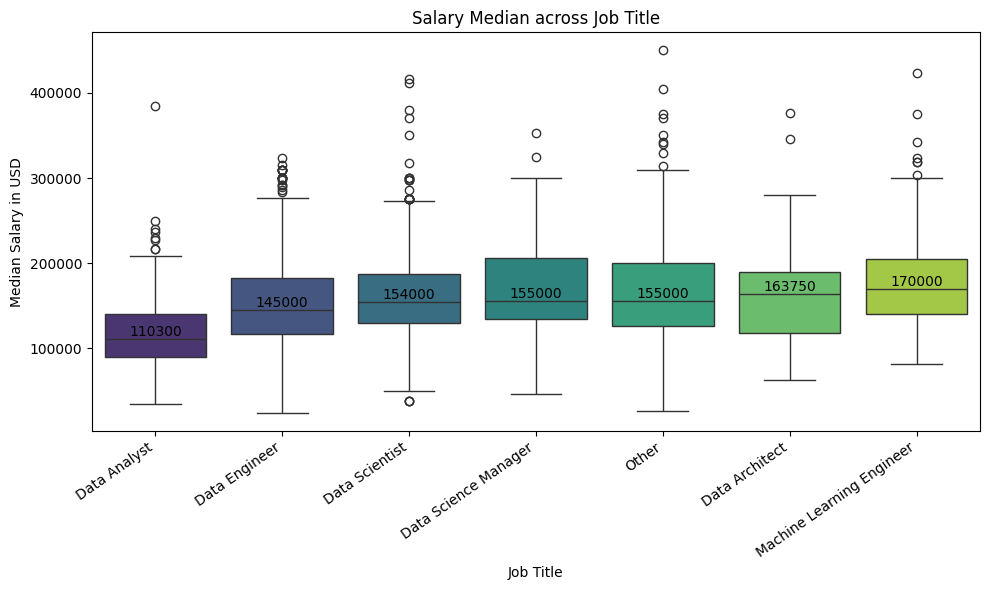

In [ ]:

# 직무별 중앙값 계산
median_salary_by_title = data_cleaned.groupby('job_title')['salary_in_usd'].median().reset_index()
median_salary_by_title = median_salary_by_title.sort_values(by='salary_in_usd', ascending=True)

# 직무별 순서를 중앙값을 기준으로 변경
data_cleaned['job_title'] = pd.Categorical(data_cleaned['job_title'], categories=median_salary_by_title['job_title'].tolist(), ordered=True)

# seaborn을 사용하여 상자그림 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=data_cleaned, palette='viridis')
plt.title('Salary Median across Job Title')
plt.xlabel('Job Title')
plt.ylabel('Median Salary in USD')

# 중앙값 표시
for index, value in enumerate(median_salary_by_title['salary_in_usd']):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

# 회사 크기별 salary 분석

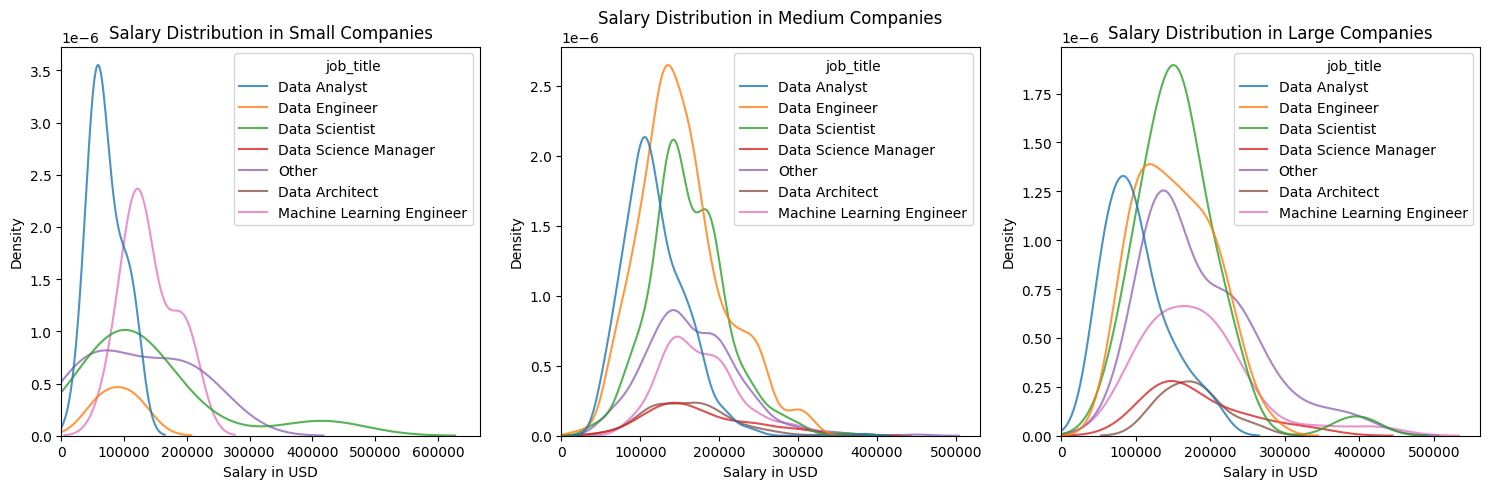

In [ ]:
# 음수 값을 제외한 데이터
data_cleaned_non_negative = data_cleaned[data_cleaned['salary_in_usd'] >= 0]

plt.figure(figsize=(15, 5))

# 회사 크기(Small)에 대한 그래프
plt.subplot(1, 3, 1)
sns.kdeplot(data=data_cleaned_non_negative[data_cleaned_non_negative['company_size'] == 'S'], x='salary_in_usd', hue='job_title', alpha=0.8, multiple='layer')
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Salary Distribution in Small Companies')
plt.xlim(0)  # x 축 범위를 0 이상으로 설정

# 회사 크기(Medium)에 대한 그래프
plt.subplot(1, 3, 2)
sns.kdeplot(data=data_cleaned_non_negative[data_cleaned_non_negative['company_size'] == 'M'], x='salary_in_usd', hue='job_title', alpha=0.8, multiple='layer')
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Salary Distribution in Medium Companies')
plt.xlim(0)  # x 축 범위를 0 이상으로 설정

# 회사 크기(Large)에 대한 그래프
plt.subplot(1, 3, 3)
sns.kdeplot(data=data_cleaned_non_negative[data_cleaned_non_negative['company_size'] == 'L'], x='salary_in_usd', hue='job_title', alpha=0.8, multiple='layer')
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Salary Distribution in Large Companies')
plt.xlim(0)  # x 축 범위를 0 이상으로 설정

# subplot의 레이아웃 조정
plt.tight_layout()
plt.show()

# 경력별 salary 분포

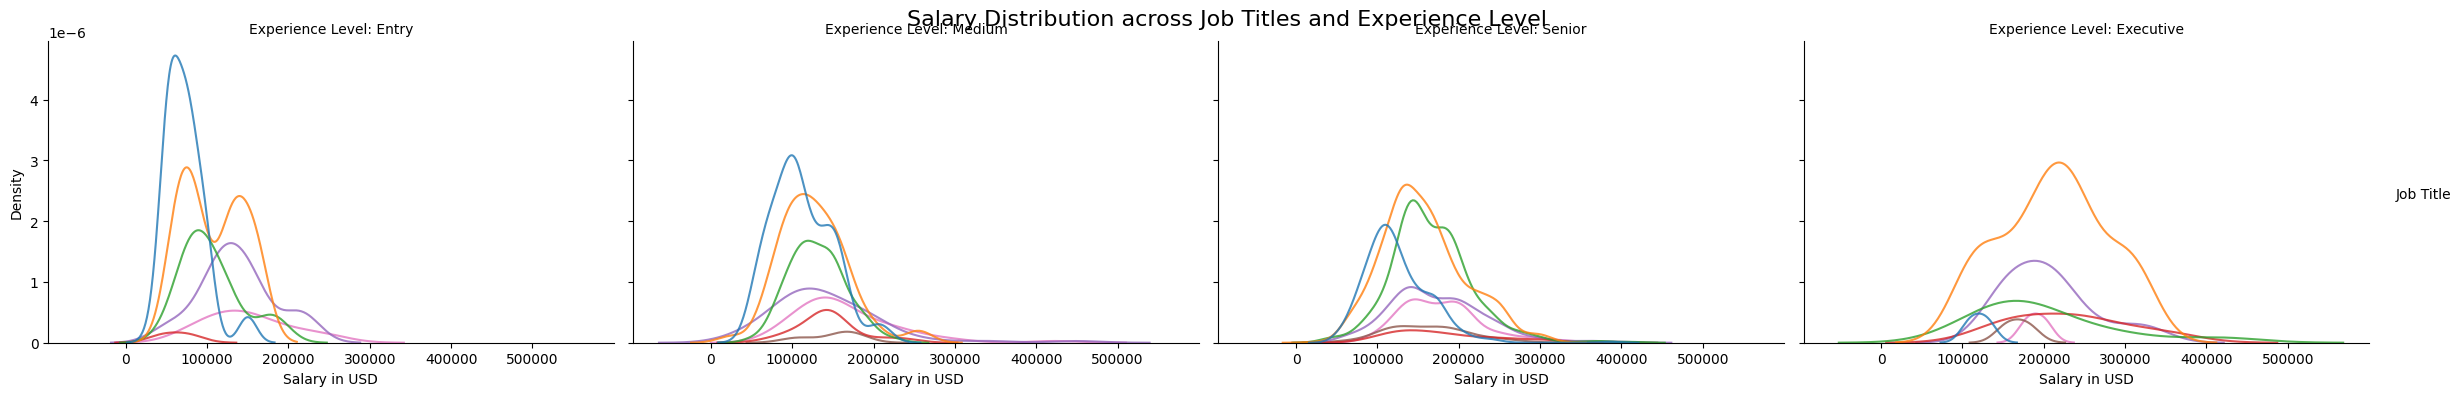

In [ ]:

# seaborn을 사용하여 밀도 플롯 그리기
g = sns.FacetGrid(data=data_cleaned, col='experience_level', height=4, aspect=1.5)
g.map(sns.kdeplot, 'salary_in_usd', hue='job_title', alpha=0.8, data=data_cleaned)
g.set_xlabels('Salary in USD')
g.set_ylabels('Density')
g.set_titles('Experience Level: {col_name}')
g.add_legend(title='Job Title')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Salary Distribution across Job Titles and Experience Level', fontsize=16)
plt.show()



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# 데이터 불러오기
data =pd.read_csv("/content/gdrive/MyDrive/ds_salaries.csv")

In [10]:
# 필요한 열만 선택
features = ['company_size', 'experience_level', 'job_title']
target = 'salary_in_usd'
data = data[features + [target]]

In [11]:
# 범주형 데이터를 더미 변수로 변환
data = pd.get_dummies(data)

In [12]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

In [13]:
# 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

In [15]:
# 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3119175476.4477158
